In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.sentiment
import re
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

What are the most common words + phrases in the entire dataset, spam messages, and ham messages?

In [5]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

Text(0.5, 0, 'Number of occurances')

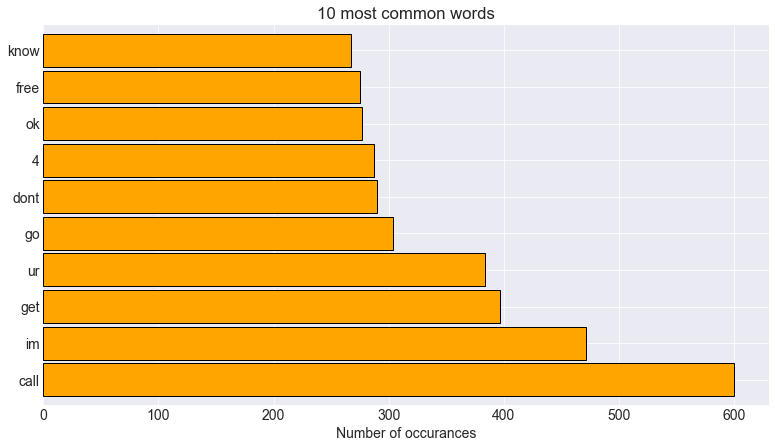

In [6]:
pd.Series(all_words).value_counts().head(10).plot.barh(width=.9, ec='black', color='orange', title='10 most common words')
plt.xlabel('Number of occurances')

In [7]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [8]:
spam_freq

call                 359
free                 216
txt                  150
ur                   144
text                 137
                    ... 
helen                  1
ringtoneking           1
087147123779am7pm      1
career                 1
241                    1
Length: 2783, dtype: int64

In [9]:
ham_freq

im            458
get           314
go            273
ok            272
dont          268
             ... 
agidhane        1
howda           1
parachute       1
hmmmhow         1
weighthaha      1
Length: 6935, dtype: int64

In [10]:
word_counts = pd.concat([
    all_freq,
    ham_freq,
    spam_freq,
], axis=1)
word_counts = word_counts.fillna(0).astype(int)
word_counts.columns = ['all', 'ham', 'spam']
word_counts

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
...,...,...,...
zoe,2,1,1
zogtorius,1,1,0
zoom,1,1,0
zouk,1,0,1


In [11]:
word_counts.spam.sort_values().tail(20)

week        62
cash        62
urgent      63
nokia       65
send        67
new         69
service     72
tone        73
get         83
prize       94
reply      102
stop       113
claim      115
4          119
mobile     135
text       137
ur         144
txt        150
free       216
call       359
Name: spam, dtype: int64

In [12]:
word_counts.ham.sort_values().tail(20)

4       168
one     170
need    171
want    183
love    193
time    213
day     214
good    223
got     231
like    232
ur      240
ill     240
know    241
call    241
come    242
dont    268
ok      272
go      273
get     314
im      458
Name: ham, dtype: int64

In [13]:
pd.Series(nltk.bigrams(all_words)).value_counts()

(please, call)         53
(call, later)          52
(ill, call)            48
(let, know)            42
(dont, know)           39
                       ..
(home, week)            1
(depressed, sittin)     1
(b, slightly)           1
(run, ttyl)             1
(best, watch)           1
Length: 37441, dtype: int64

2. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

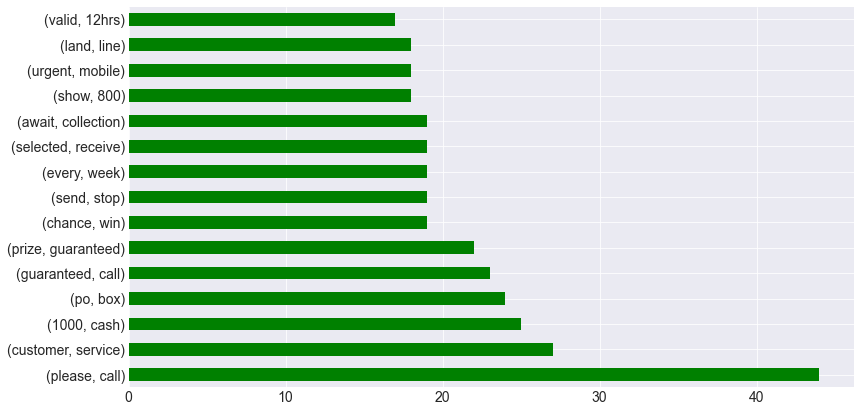

In [14]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(color='green')

(-0.5, 1199.5, 899.5, -0.5)

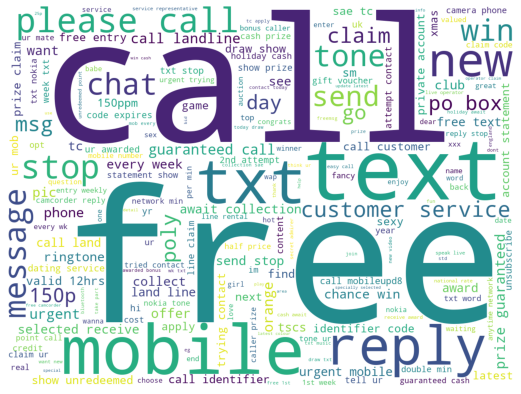

In [15]:
from wordcloud import WordCloud

text = ' '.join(spam_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

(-0.5, 1199.5, 899.5, -0.5)

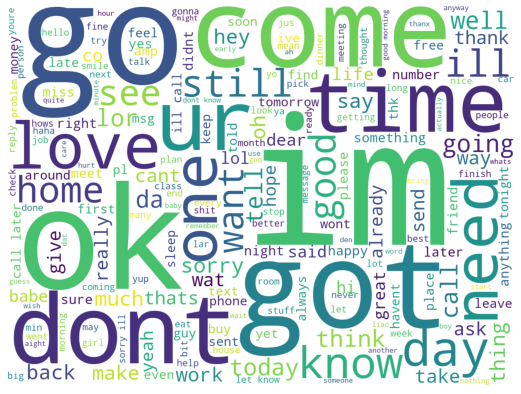

In [16]:
text = ' '.join(ham_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

3. Is there any overlap in the bigrams for the spam data and the ham data?

In [17]:
s1 = pd.Series(nltk.bigrams(ham_words))
s1

0              (go, jurong)
1           (jurong, point)
2            (point, crazy)
3        (crazy, available)
4        (available, bugis)
                ...        
38065             (gave, u)
38066             (u, free)
38067          (free, rofl)
38068          (rofl, true)
38069          (true, name)
Length: 38070, dtype: object

In [18]:
s2 = pd.Series(nltk.bigrams(spam_words))
s2

0                   (free, entry)
1                   (entry, wkly)
2                    (wkly, comp)
3                     (comp, win)
4                       (win, fa)
                   ...           
12155        (087187272008, now1)
12156                 (now1, 10p)
12157                  (10p, per)
12158               (per, minute)
12159    (minute, btnationalrate)
Length: 12160, dtype: object

In [19]:
bigrams = pd.concat([s1,s2,], axis=1)
bigrams.columns = ['ham', 'spam']
bigrams

,ham,spam
0,"(go, jurong)","(free, entry)"
1,"(jurong, point)","(entry, wkly)"
2,"(point, crazy)","(wkly, comp)"
3,"(crazy, available)","(comp, win)"
4,"(available, bugis)","(win, fa)"
...,...,...
38065,"(gave, u)",NaN
38066,"(u, free)",NaN
38067,"(free, rofl)",NaN
38068,"(rofl, true)",NaN


In [20]:
bigrams[bigrams.ham == bigrams.spam]

,ham,spam


Looks like there's no overlap of bigrams for the spam data and the ham data

3. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [21]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


- Are there any words that uniquely identify a spam or ham message?

In [22]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [23]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


In [24]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])

,all,ham,spam
thats,101,101,0
say,118,118,0
da,132,132,0
later,134,134,0
_,135,135,0
lor,160,160,0
18,43,0,43
500,44,0,44
guaranteed,50,0,50
tone,73,0,73


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

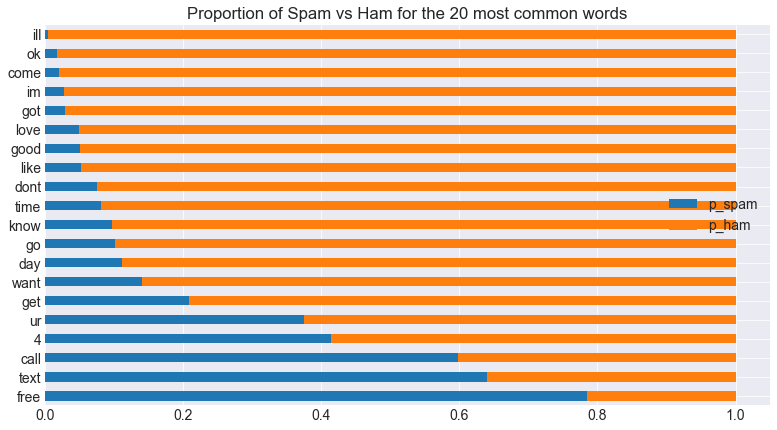

In [25]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

In [26]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,ham,spam,ratio
im,471,458,13,0.028384
good,235,223,12,0.053809
like,245,232,13,0.056032
need,182,171,11,0.064324
dont,290,268,22,0.082086
contact,70,14,56,3.997145
win,76,15,61,4.063957
cash,74,12,62,5.162365
mobile,150,15,135,8.994004
txt,163,13,150,11.529593


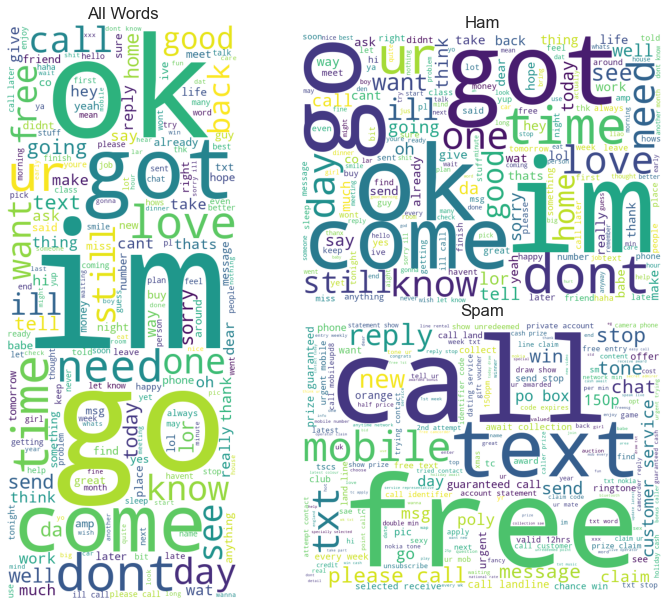

In [27]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

In [28]:
pd.Series(nltk.trigrams(all_words)).value_counts()

(ill, call, later)            42
(sorry, ill, call)            38
(prize, guaranteed, call)     21
(happy, new, year)            19
(call, customer, service)     15
                              ..
(india, padhegm, uncle)        1
(hows, saturday, go)           1
(back, xafter, msg)            1
(something, call, germany)     1
(training, lol, real)          1
Length: 43261, dtype: int64

In [29]:
pd.Series(nltk.trigrams(ham_words)).value_counts()

(ill, call, later)                  42
(sorry, ill, call)                  38
(happy, new, year)                  19
(pls, send, message)                13
(right, pls, send)                  12
                                    ..
(begun, registration, permanent)     1
(may, lesson, 8am)                   1
(pc, mom, find)                      1
(long, time, ago)                    1
(yellow, rose, day)                  1
Length: 35176, dtype: int64

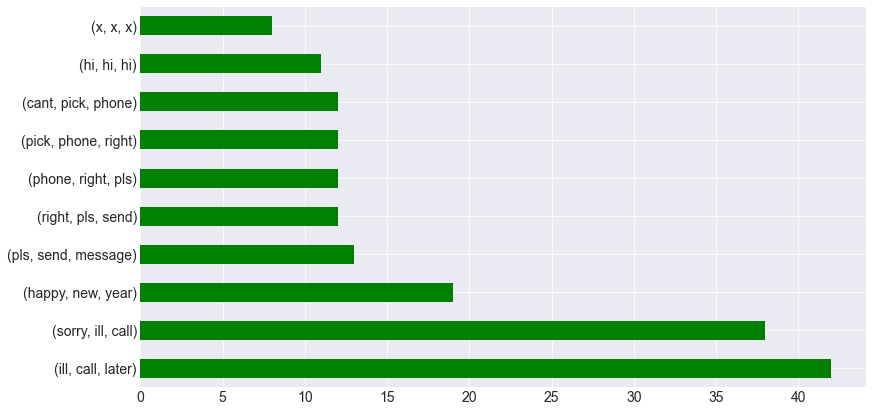

In [30]:
pd.Series(nltk.trigrams(ham_words)).value_counts().head(10).plot.barh(color='green')

In [31]:
pd.Series(nltk.trigrams(spam_words)).value_counts()

(prize, guaranteed, call)       21
(call, customer, service)       15
(land, line, claim)             14
(reply, call, 08000930705)      14
(private, 2003, account)        13
                                ..
(please, see, channel)           1
(talk, sexy, make)               1
(2007, uk, tour)                 1
(may, entitled, 3750)            1
(transferred, someone, else)     1
Length: 8082, dtype: int64

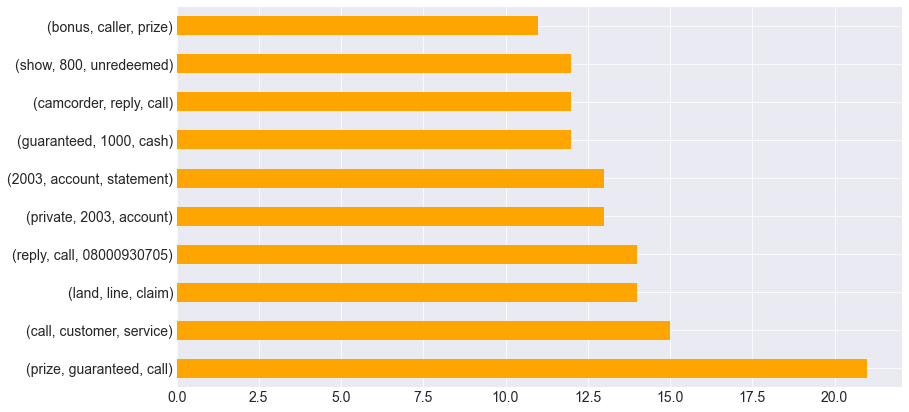

In [32]:
pd.Series(nltk.trigrams(spam_words)).value_counts().head(10).plot.barh(color='orange')

2. Explore the blog articles using the techniques discussed in the exploration lesson

In [34]:
import prepare 

In [39]:
df = prepare.prep_blog_articles()
df

,title,original_content,stemmed,lemmatized,clean_lemmatized
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time ha arrived codeup ha officiall...
1,Data Science Myths,By Dimitri Antoniou and Maggie GiustData Scien...,by dimitri antoni and maggi giustdata scienc b...,by dimitri antoniou and maggie giustdata scien...,dimitri antoniou maggie giustdata science big ...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri AntoniouA week ago, Codeup launched...",by dimitri antonioua week ago codeup launch ou...,by dimitri antonioua week ago codeup launched ...,dimitri antonioua week ago codeup launched imm...
3,10 Tips to Crush It at the SA Tech Job Fair,10 Tips to Crush It at the SA Tech Job FairSA ...,10 tip to crush it at the sa tech job fairsa t...,10 tip to crush it at the sa tech job fairsa t...,10 tip crush sa tech job fairsa tech job fairt...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...


What are the most common words + phrases in the entire dataset?

In [55]:
all_words = clean(' '.join(df.clean_lemmatized))
len(all_words)

1558

Text(0.5, 0, 'Number of occurances')

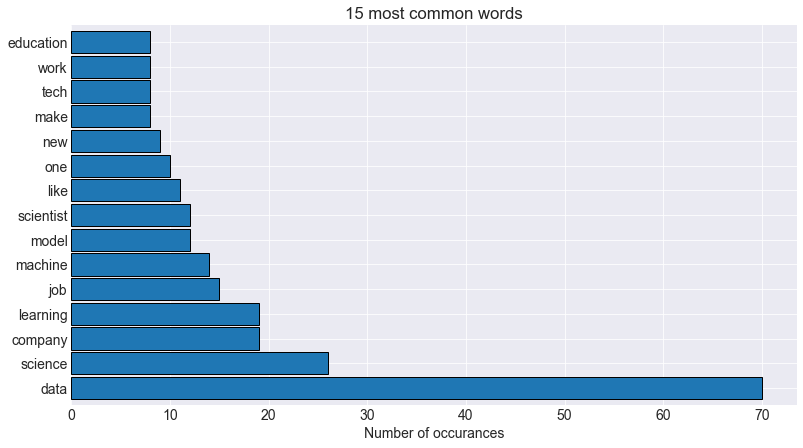

In [60]:
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words')
plt.xlabel('Number of occurances')

(-0.5, 1199.5, 899.5, -0.5)

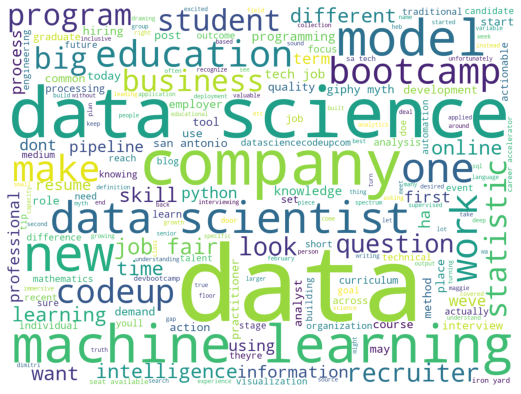

In [61]:
text = ' '.join(all_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

### Other Common Features
    Domain Specific
    character count
    word count
    sentence count

In [62]:
df['ch_count'] = df.clean_lemmatized.apply(len)

In [63]:
df['word_count'] = df.clean_lemmatized.apply(clean).apply(len)

In [65]:
df['sentence_count'] = df.clean_lemmatized.apply(nltk.sent_tokenize).apply(len)

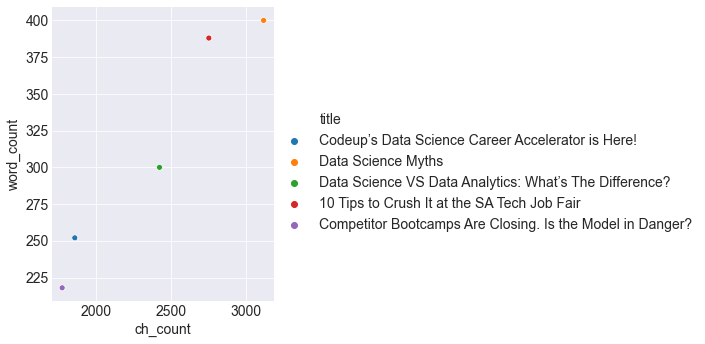

In [66]:
sns.relplot(data=df, y='word_count', x='ch_count', hue='title')

In [70]:
df.groupby('title').median()

,ch_count,word_count,sentence_count
title,,,
10 Tips to Crush It at the SA Tech Job Fair,2751,388,1
Codeup’s Data Science Career Accelerator is Here!,1860,252,1
Competitor Bootcamps Are Closing. Is the Model in Danger?,1776,218,1
Data Science Myths,3115,400,1
Data Science VS Data Analytics: What’s The Difference?,2423,300,1


### Sentiment Analysis
    Is this text generally positive or generally negative?
    Statistical + knowledge based approach
    Vader Sentiment Analyzer: purpose built for social media
    afinn

In [72]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [73]:
sia.polarity_scores('Today is a awesome day!')

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}

In [74]:
sia.polarity_scores('It is great!')

{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'compound': 0.6588}

In [75]:
sia.polarity_scores('Would you like go and eat something?')

{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}

In [76]:
df['sentiment'] = df.clean_lemmatized.apply(lambda word: sia.polarity_scores(word)['compound'])

In [77]:
df.groupby('title').sentiment.mean()

title
10 Tips to Crush It at the SA Tech Job Fair                  0.9975
Codeup’s Data Science Career Accelerator is Here!            0.9869
Competitor Bootcamps Are Closing. Is the Model in Danger?    0.7783
Data Science Myths                                           0.9881
Data Science VS Data Analytics: What’s The Difference?       0.9531
Name: sentiment, dtype: float64

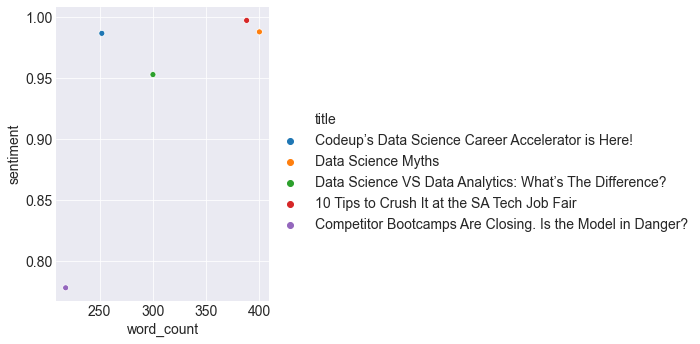

In [79]:
sns.relplot(data=df, x='word_count', y='sentiment', hue='title')

In [80]:
df['multisentence'] = df.sentence_count > 1

In [84]:
df.groupby(['title', 'multisentence']).sentiment.describe()

,,count,mean,std,min,25%,50%,75%,max
title,multisentence,,,,,,,,
10 Tips to Crush It at the SA Tech Job Fair,False,1.0,0.9975,NaN,0.9975,0.9975,0.9975,0.9975,0.9975
Codeup’s Data Science Career Accelerator is Here!,False,1.0,0.9869,NaN,0.9869,0.9869,0.9869,0.9869,0.9869
Competitor Bootcamps Are Closing. Is the Model in Danger?,False,1.0,0.7783,NaN,0.7783,0.7783,0.7783,0.7783,0.7783
Data Science Myths,False,1.0,0.9881,NaN,0.9881,0.9881,0.9881,0.9881,0.9881
Data Science VS Data Analytics: What’s The Difference?,False,1.0,0.9531,NaN,0.9531,0.9531,0.9531,0.9531,0.9531


In [85]:
df

,title,original_content,stemmed,lemmatized,clean_lemmatized,ch_count,word_count,sentence_count,sentiment,multisentence
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time ha arrived codeup ha officiall...,1860,252,1,0.9869,False
1,Data Science Myths,By Dimitri Antoniou and Maggie GiustData Scien...,by dimitri antoni and maggi giustdata scienc b...,by dimitri antoniou and maggie giustdata scien...,dimitri antoniou maggie giustdata science big ...,3115,400,1,0.9881,False
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri AntoniouA week ago, Codeup launched...",by dimitri antonioua week ago codeup launch ou...,by dimitri antonioua week ago codeup launched ...,dimitri antonioua week ago codeup launched imm...,2423,300,1,0.9531,False
3,10 Tips to Crush It at the SA Tech Job Fair,10 Tips to Crush It at the SA Tech Job FairSA ...,10 tip to crush it at the sa tech job fairsa t...,10 tip to crush it at the sa tech job fairsa t...,10 tip crush sa tech job fairsa tech job fairt...,2751,388,1,0.9975,False
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,1776,218,1,0.7783,False
